In [100]:
import pandas as pd
import os
import datetime
import time
import pickle
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_obj(name):
    with open('data/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [10]:
finance_dat = load_obj('historicDat_June')
insiderDat = pd.read_csv('data/insiderDat_June_clean.csv')
insiderDat.head()

,X,FilingDate,TradeDate,Ticker,CompanyName,InsiderName,Title,TradeType,Price,Qty,Owned,DeltaOwn,Value,1d,1w,1m,6m
0,NaN,2021-06-11 18:00:00,2021-06-11 00:00:00,IBP,"Installed Building Products, Inc.",Thomas Michael H,Dir,S - Sale,116.85,-2100.0,10093.0,-17.0,245378.0,NaN,NaN,NaN,NaN
1,NaN,2021-06-11 19:21:00,2021-06-11 00:00:00,DXC,Dxc Technology Co,Fernandez Raul J,Dir,P - Purchase,41.20,1820.0,31305.0,6.0,74975.0,NaN,NaN,NaN,NaN
2,NaN,2021-06-11 16:50:00,2021-06-11 00:00:00,REVG,"Rev Group, Inc.",Boettinger Stephen W.,GC,P - Purchase,15.64,1500.0,121560.0,1.0,23460.0,NaN,NaN,NaN,NaN
3,NaN,2021-06-11 19:43:00,2021-06-11 00:00:00,AMST,Amesite Inc.,Sastry Ann Marie,CEO,P - Purchase,3.73,15000.0,6241667.0,0.0,55950.0,NaN,NaN,NaN,NaN
4,NaN,2021-06-11 19:47:00,2021-06-11 00:00:00,TLYS,"Tilly'S, Inc.",Zeichner Bernard,Dir,S - Sale,16.24,-5000.0,46894.0,-10.0,81200.0,NaN,NaN,NaN,NaN


In [81]:
insiderDat.Ticker.value_counts()

CRM     23
SAM     18
TPL     16
VLDR    14
NTRA    14
        ..
HMN      1
DCO      1
IBTX     1
EVA      1
CFX      1
Name: Ticker, Length: 898, dtype: int64

In [104]:
def plotFinDat(tick, insiderDat):
    insiderDat.TradeDate = [np.datetime64(td) for td in insiderDat.TradeDate]
    groups = insiderDat.groupby('TradeType')

    fin_av = [(finance_dat[tick].High[i] + finance_dat[tick].Low[i])/2 for i in range(len(finance_dat[tick]))]

    fig, ax = plt.subplots()
    ax.plot(finance_dat[tick].index,fin_av)
    ax.fill_between(finance_dat[tick].index, finance_dat[tick].Low, finance_dat[tick].High, color='b', alpha=.1)
    for name, group in groups:
        ax.plot(group.TradeDate, group.Price, marker='o', linestyle='', label=name)
    ax.legend()
    #ax.scatter(x = [np.datetime64(td) for td in insiderDat.TradeDate],y = insiderDat.Price, color='r')
    #ax.legend([plt.Line2D((0,1),(0,0), color='k', marker='o', linestyle='')], ['Sale'])
    plt.xticks(rotation=45)

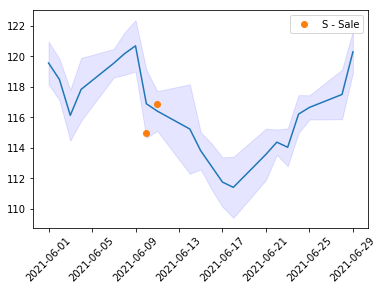

In [105]:
plotFinDat('IBP', insiderDat[insiderDat.Ticker == 'IBP'])

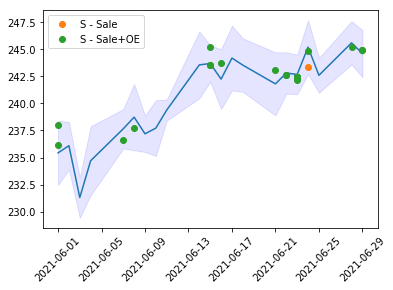

In [106]:
plotFinDat('CRM', insiderDat[insiderDat.Ticker == 'CRM'])

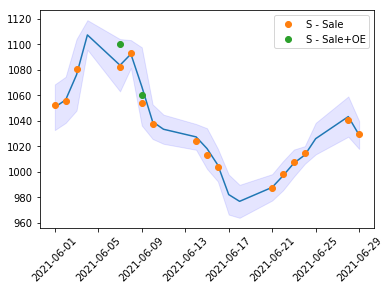

In [107]:
plotFinDat('SAM', insiderDat[insiderDat.Ticker == 'SAM'])